In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import io
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
import scipy.stats as stats
from google.colab import files
 

In [2]:
uploaded = files.upload()

Saving hmeq.csv to hmeq.csv


In [3]:
csv = pd.read_csv('hmeq.csv')
data = csv.copy()
data.count()

BAD        5960
LOAN       5960
MORTDUE    5442
VALUE      5848
REASON     5708
JOB        5681
YOJ        5445
DEROG      5252
DELINQ     5380
CLAGE      5652
NINQ       5450
CLNO       5738
DEBTINC    4693
dtype: int64

In [4]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
for i in data.columns: 
    print (data[i].value_counts())
    print("--------")

0    4771
1    1189
Name: BAD, dtype: int64
--------
15000    105
10000     81
20000     74
25000     73
12000     69
        ... 
59700      1
47100      1
79900      1
59500      1
65500      1
Name: LOAN, Length: 540, dtype: int64
--------
42000.0     11
47000.0     10
65000.0      9
55000.0      7
50000.0      7
            ..
96049.0      1
183615.0     1
52622.0      1
132417.0     1
4000.0       1
Name: MORTDUE, Length: 5053, dtype: int64
--------
60000.0    15
80000.0    14
85000.0    12
65000.0    11
78000.0    10
           ..
65054.0     1
84519.0     1
64850.0     1
65040.0     1
76207.0     1
Name: VALUE, Length: 5381, dtype: int64
--------
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
--------
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
--------
0.00     415
1.00     363
2.00     347
5.00     333
4.00     324
        ... 
4.60       1
17.80      1
0.25       1
5.60       1
6.60       

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [0]:
def MissingUniqueStatistics(df):

    import io
    import pandas as pd
    
    import psutil, os, gc, time
    print("MissingUniqueStatistics process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()

    entry_lenght_list = []
    variable_name_list = []
    total_entry_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []

    for col in df.columns:

        buf = io.StringIO()
        df[[col]].info(buf=buf)
        data_info = buf.getvalue().split('\n') #converting to a string object done
        entry_lenght = int(data_info[1].split(' ')[1])
        variable_name = data_info[3].split(' ')[0]
        total_entry = int(data_info[3].split('    ')[1].split(' ')[0])
        missing_value_number = entry_lenght - total_entry
        missing_value_ratio = round(float(missing_value_number/entry_lenght),4)
        data_type = data_info[3].split('    ')[1].split(' ')[2]

        number_of_unique_values = len(df[col].unique())
        unique_values = df[col].unique()

        entry_lenght_list.append(entry_lenght)
        variable_name_list.append(variable_name)
        total_entry_list.append(total_entry)
        missing_value_number_list.append(missing_value_number)
        missing_value_ratio_list.append(missing_value_ratio)
        data_type_list.append(data_type)
        unique_values_list.append(unique_values)
        number_of_unique_values_list.append(number_of_unique_values)

    data_info_df = pd.DataFrame({'Variable': variable_name_list, '#_Total_Entry':total_entry_list,\
                                 '#_Missing_Value': missing_value_number_list,'%_Missing_Value':missing_value_ratio_list,\
                                 'Data_Type': data_type_list, 'Unique_Values': unique_values_list,\
                                 '#_Unique_Values':number_of_unique_values_list})
    
    print('MissingUniqueStatistics process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    return data_info_df.sort_values(by='%_Missing_Value', ascending=False)

In [10]:
data_analysis = MissingUniqueStatistics(data)

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0008286237716674805 minutes ---


In [11]:
data_analysis['Index'] = range(1, len(data_analysis.index)+1)
data_analysis.set_index("Index", inplace=True)
data_analysis

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values
Index,,,,,,,
1,DEBTINC,4693,1267,0.2126,float64,"[nan, 37.113613558000004, 36.884894093, 3.7113...",4694
2,DEROG,5252,708,0.1188,float64,"[0.0, nan, 3.0, 2.0, 1.0, 4.0, 5.0, 6.0, 7.0, ...",12
3,DELINQ,5380,580,0.0973,float64,"[0.0, 2.0, nan, 1.0, 6.0, 15.0, 4.0, 3.0, 5.0,...",15
4,MORTDUE,5442,518,0.0869,float64,"[25860.0, 70053.0, 13500.0, nan, 97800.0, 3054...",5054
5,YOJ,5445,515,0.0864,float64,"[10.5, 7.0, 4.0, nan, 3.0, 9.0, 5.0, 11.0, 16....",100
6,NINQ,5450,510,0.0856,float64,"[1.0, 0.0, nan, 2.0, 3.0, 5.0, 14.0, 10.0, 4.0...",17
7,CLAGE,5652,308,0.0517,float64,"[94.366666667, 121.83333333, 149.46666667, nan...",5315
8,JOB,5681,279,0.0468,object,"[Other, nan, Office, Sales, Mgr, ProfExe, Self]",7
9,REASON,5708,252,0.0423,object,"[HomeImp, nan, DebtCon]",3


In [0]:
%matplotlib inline
# Histogram of the target categories
def histogram(data,feature):
    #data = input("Enter a DataFrame name: ")
    #col = input("Enter a target column name: ")
    #data=eval(data)
    ncount = len(data)
    ax = sns.countplot(x = feature, data=data ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel('Target Segments')
    plt.xticks(rotation=90)
    ax.set_ylabel('Number of Observations')
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)
    plt.show()
    #plt.savefig('col.png')
    del ncount, x, y

In [0]:
data_analysis['variableTypes'] = pd.Series(['continuous-ratio','discrete','discrete','continuous-ratio','discrete','discrete','continuous-ratio','nominal','nominal','discrete','continuous-ratio','nominal','continuous-ratio'],index=data_analysis.index)

In [14]:
data_analysis

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,variableTypes
Index,,,,,,,,
1,DEBTINC,4693,1267,0.2126,float64,"[nan, 37.113613558000004, 36.884894093, 3.7113...",4694,continuous-ratio
2,DEROG,5252,708,0.1188,float64,"[0.0, nan, 3.0, 2.0, 1.0, 4.0, 5.0, 6.0, 7.0, ...",12,discrete
3,DELINQ,5380,580,0.0973,float64,"[0.0, 2.0, nan, 1.0, 6.0, 15.0, 4.0, 3.0, 5.0,...",15,discrete
4,MORTDUE,5442,518,0.0869,float64,"[25860.0, 70053.0, 13500.0, nan, 97800.0, 3054...",5054,continuous-ratio
5,YOJ,5445,515,0.0864,float64,"[10.5, 7.0, 4.0, nan, 3.0, 9.0, 5.0, 11.0, 16....",100,discrete
6,NINQ,5450,510,0.0856,float64,"[1.0, 0.0, nan, 2.0, 3.0, 5.0, 14.0, 10.0, 4.0...",17,discrete
7,CLAGE,5652,308,0.0517,float64,"[94.366666667, 121.83333333, 149.46666667, nan...",5315,continuous-ratio
8,JOB,5681,279,0.0468,object,"[Other, nan, Office, Sales, Mgr, ProfExe, Self]",7,nominal
9,REASON,5708,252,0.0423,object,"[HomeImp, nan, DebtCon]",3,nominal


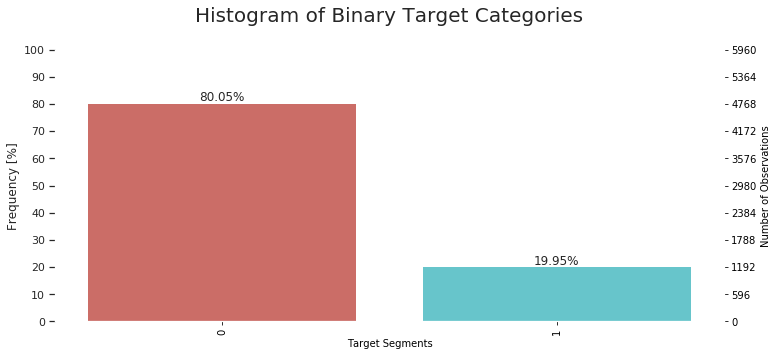

In [15]:
histogram(data,"BAD")

In [16]:
data_analysis['Missing_Elimination']=""
for i in range(1,len(data_analysis)+1) :
    if data_analysis['%_Missing_Value'][i] <= (0.05):
        data_analysis['Missing_Elimination'][i]='Simple'
    elif data_analysis['%_Missing_Value'][i] < (0.25):
        data_analysis['Missing_Elimination'][i]='Tree-based'
    elif data_analysis['%_Missing_Value'][i] < (0.5) :
        data_analysis['Missing_Elimination'][i]='Model'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
data_analysis

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,variableTypes,Missing_Elimination
Index,,,,,,,,,
1,DEBTINC,4693,1267,0.2126,float64,"[nan, 37.113613558000004, 36.884894093, 3.7113...",4694,continuous-ratio,Tree-based
2,DEROG,5252,708,0.1188,float64,"[0.0, nan, 3.0, 2.0, 1.0, 4.0, 5.0, 6.0, 7.0, ...",12,discrete,Tree-based
3,DELINQ,5380,580,0.0973,float64,"[0.0, 2.0, nan, 1.0, 6.0, 15.0, 4.0, 3.0, 5.0,...",15,discrete,Tree-based
4,MORTDUE,5442,518,0.0869,float64,"[25860.0, 70053.0, 13500.0, nan, 97800.0, 3054...",5054,continuous-ratio,Tree-based
5,YOJ,5445,515,0.0864,float64,"[10.5, 7.0, 4.0, nan, 3.0, 9.0, 5.0, 11.0, 16....",100,discrete,Tree-based
6,NINQ,5450,510,0.0856,float64,"[1.0, 0.0, nan, 2.0, 3.0, 5.0, 14.0, 10.0, 4.0...",17,discrete,Tree-based
7,CLAGE,5652,308,0.0517,float64,"[94.366666667, 121.83333333, 149.46666667, nan...",5315,continuous-ratio,Tree-based
8,JOB,5681,279,0.0468,object,"[Other, nan, Office, Sales, Mgr, ProfExe, Self]",7,nominal,Simple
9,REASON,5708,252,0.0423,object,"[HomeImp, nan, DebtCon]",3,nominal,Simple


In [18]:
data.groupby("JOB")["VALUE"].mean()

JOB
Mgr        108628.262697
Office      94081.816756
Other       84787.503377
ProfExe    131118.204130
Sales      108449.592593
Self       149734.106383
Name: VALUE, dtype: float64

In [0]:
def bar_chart(feature):
    status_bad = data[data['BAD']==1][feature].value_counts()
    status_good = data[data['BAD']==0][feature].value_counts()
    df_t = pd.DataFrame([status_bad,status_good])
    df_t.index=["BAD","GOOD"]
    df_t.plot(kind='bar',stacked=True,fig=(18,6),title=feature)

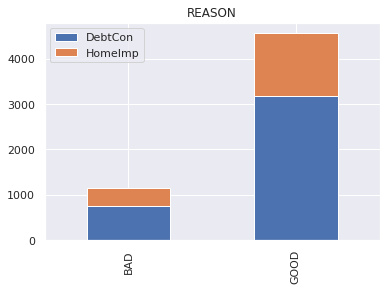

In [20]:
bar_chart("REASON")

In [21]:
data.corr(method ='pearson') 

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.048219,-0.029954,-0.060238,0.276081,0.354107,-0.170499,0.174980,-0.004157,0.199835
LOAN,-0.075099,1.000000,0.228595,0.335393,0.105728,-0.001302,-0.035144,0.088540,0.044487,0.072631,0.084735
MORTDUE,-0.048219,0.228595,1.000000,0.875666,-0.088480,-0.049516,-0.001044,0.140047,0.031392,0.323631,0.154939
VALUE,-0.029954,0.335393,0.875666,1.000000,0.007759,-0.048689,-0.014103,0.171238,-0.004398,0.269149,0.132174
YOJ,-0.060238,0.105728,-0.088480,0.007759,1.000000,-0.065879,0.038153,0.201718,-0.071627,0.024838,-0.055891
DEROG,0.276081,-0.001302,-0.049516,-0.048689,-0.065879,1.000000,0.211832,-0.083047,0.173934,0.061884,0.017065
DELINQ,0.354107,-0.035144,-0.001044,-0.014103,0.038153,0.211832,1.000000,0.022488,0.067812,0.164639,0.052364
CLAGE,-0.170499,0.088540,0.140047,0.171238,0.201718,-0.083047,0.022488,1.000000,-0.116935,0.237987,-0.046477
NINQ,0.174980,0.044487,0.031392,-0.004398,-0.071627,0.173934,0.067812,-0.116935,1.000000,0.088389,0.141344
CLNO,-0.004157,0.072631,0.323631,0.269149,0.024838,0.061884,0.164639,0.237987,0.088389,1.000000,0.185539


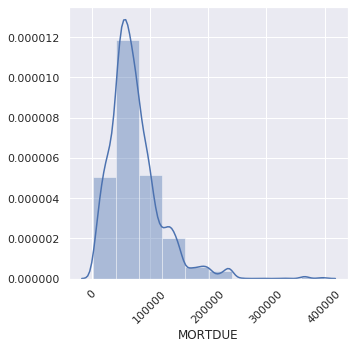

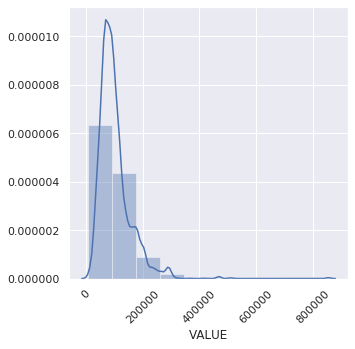

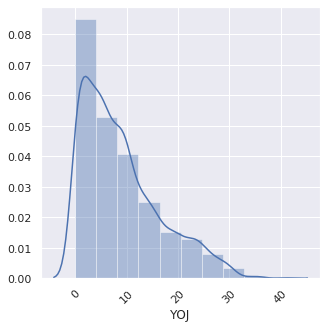

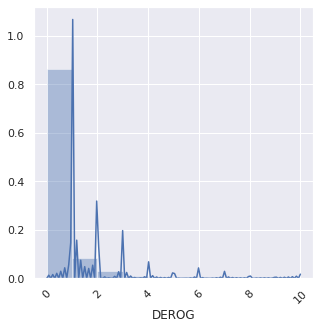

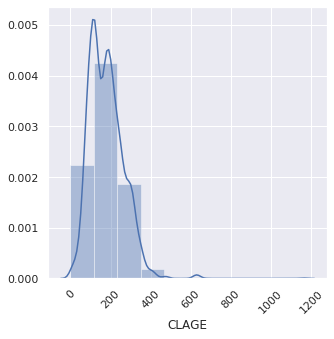

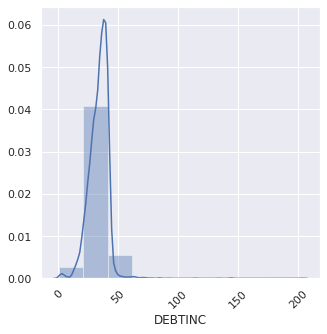

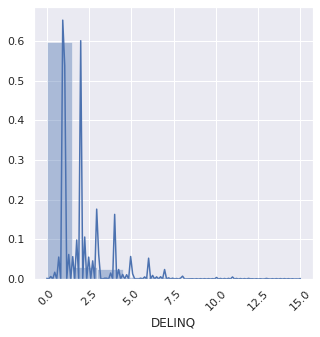

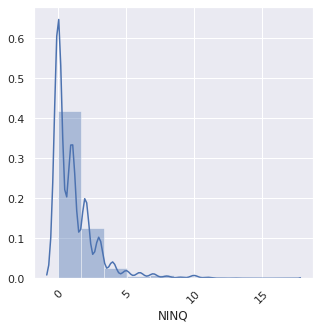

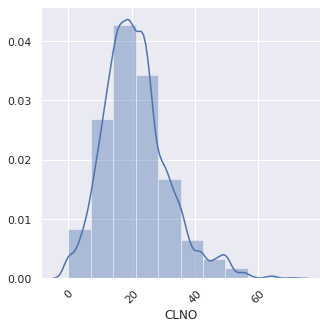

In [22]:
# Numerical features
numerical_cols = [cname for cname in data.columns if
                 data[cname].dtype in ['float']]
num = data[numerical_cols]
num.columns

# Visualizations
sns.set( rc = {'figure.figsize': (5, 5)})
fnum = ['MORTDUE','VALUE','YOJ','DEROG','CLAGE','DEBTINC','DELINQ','NINQ','CLNO']

for col in fnum:
    plt.figure()
    x=num[col]
    sns.distplot(x, bins=10)
    plt.xticks(rotation=45)
    plt.show()

In [23]:
len(data.index) == data.shape[0]

True

In [0]:
data_analysis.set_index("Variable",inplace=True)


In [25]:
data_analysis

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,variableTypes,Missing_Elimination
Variable,,,,,,,,
DEBTINC,4693,1267,0.2126,float64,"[nan, 37.113613558000004, 36.884894093, 3.7113...",4694,continuous-ratio,Tree-based
DEROG,5252,708,0.1188,float64,"[0.0, nan, 3.0, 2.0, 1.0, 4.0, 5.0, 6.0, 7.0, ...",12,discrete,Tree-based
DELINQ,5380,580,0.0973,float64,"[0.0, 2.0, nan, 1.0, 6.0, 15.0, 4.0, 3.0, 5.0,...",15,discrete,Tree-based
MORTDUE,5442,518,0.0869,float64,"[25860.0, 70053.0, 13500.0, nan, 97800.0, 3054...",5054,continuous-ratio,Tree-based
YOJ,5445,515,0.0864,float64,"[10.5, 7.0, 4.0, nan, 3.0, 9.0, 5.0, 11.0, 16....",100,discrete,Tree-based
NINQ,5450,510,0.0856,float64,"[1.0, 0.0, nan, 2.0, 3.0, 5.0, 14.0, 10.0, 4.0...",17,discrete,Tree-based
CLAGE,5652,308,0.0517,float64,"[94.366666667, 121.83333333, 149.46666667, nan...",5315,continuous-ratio,Tree-based
JOB,5681,279,0.0468,object,"[Other, nan, Office, Sales, Mgr, ProfExe, Self]",7,nominal,Simple
REASON,5708,252,0.0423,object,"[HomeImp, nan, DebtCon]",3,nominal,Simple


In [26]:
numerical_columns = list(data_analysis.loc[(data_analysis.loc[:,"variableTypes"]=="discrete") | (data_analysis.loc[:,"variableTypes"]=="continuous-ratio")].index)
len(numerical_columns), numerical_columns

(10,
 ['DEBTINC',
  'DEROG',
  'DELINQ',
  'MORTDUE',
  'YOJ',
  'NINQ',
  'CLAGE',
  'CLNO',
  'VALUE',
  'LOAN'])

In [0]:
def ZeroVarianceFinder(df, numerical_columns):
  
  import pandas as pd
  import numpy as np

  zerovariance_numerical_features=[]
  for col in numerical_columns:
      try:
          if pd.DataFrame(df[col]).describe().loc['std'][0] == 0.00 or \
          np.isnan(pd.DataFrame(df[col]).describe().loc['std'][0]):
              zerovariance_numerical_features.append(col)
      except:
          print("Error:",col)
  return zerovariance_numerical_features

In [28]:
zerovariance_numerical_features = ZeroVarianceFinder(data,numerical_columns)
zerovariance_numerical_features

[]

In [29]:
import sklearn
from sklearn.model_selection import train_test_split
X=data.iloc[:,1:]
y=data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4172, 12) (1788, 12) (4172,) (1788,)


In [30]:
data["CLAGE"].describe()

count    5652.000000
mean      179.766275
std        85.810092
min         0.000000
25%       115.116702
50%       173.466667
75%       231.562278
max      1168.233561
Name: CLAGE, dtype: float64

In [31]:
q1 = data["LOAN"].describe().loc["25%"]

q3 = data["LOAN"].describe().loc["75%"]
q1, q3

(11100.0, 23300.0)

In [32]:
iqr = q3 - q1
iqr

12200.0

In [33]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
lower_bound, upper_bound

(-7200.0, 41600.0)

In [34]:
data["LOAN"].describe()

count     5960.000000
mean     18607.969799
std      11207.480417
min       1100.000000
25%      11100.000000
50%      16300.000000
75%      23300.000000
max      89900.000000
Name: LOAN, dtype: float64

In [35]:
iqr_dic={}
for i in numerical_columns:
  q1 = data[i].describe().loc["25%"]
  q3 = data[i].describe().loc["75%"]
  iqr = q3 - q1
  iqr_dic[i]=(iqr,)
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr) 
  lower_bound, upper_bound
  iqr_dic[i]=(iqr,lower_bound, upper_bound)
iqr_dic

{'CLAGE': (116.44557590999997, -59.55166163499993, 406.23064200499994),
 'CLNO': (11.0, -1.5, 42.5),
 'DEBTINC': (9.863109256000005, 14.345367487999992, 53.79780451200001),
 'DELINQ': (0.0, 0.0, 0.0),
 'DEROG': (0.0, 0.0, 0.0),
 'LOAN': (12200.0, -7200.0, 41600.0),
 'MORTDUE': (45212.0, -21542.0, 159306.0),
 'NINQ': (2.0, -3.0, 5.0),
 'VALUE': (53748.75, -14547.625, 200447.375),
 'YOJ': (10.0, -12.0, 28.0)}

In [36]:
nonzero_derog = data.iloc[data["DEROG"].nonzero()]
q1 = nonzero_derog["DEROG"].describe().loc["25%"]
q3 = nonzero_derog["DEROG"].describe().loc["75%"]
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
lower_bound, upper_bound
iqr_dic['DEROG']=(iqr,lower_bound, upper_bound)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


In [37]:
nonzero_derog = data.iloc[data["DELINQ"].nonzero()]
q1 = nonzero_derog["DELINQ"].describe().loc["25%"]
q3 = nonzero_derog["DELINQ"].describe().loc["75%"]
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
lower_bound, upper_bound
iqr_dic['DELINQ']=(iqr,lower_bound, upper_bound)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


In [38]:
iqr_dic

{'CLAGE': (116.44557590999997, -59.55166163499993, 406.23064200499994),
 'CLNO': (11.0, -1.5, 42.5),
 'DEBTINC': (9.863109256000005, 14.345367487999992, 53.79780451200001),
 'DELINQ': (1.0, -0.5, 3.5),
 'DEROG': (1.0, -0.5, 3.5),
 'LOAN': (12200.0, -7200.0, 41600.0),
 'MORTDUE': (45212.0, -21542.0, 159306.0),
 'NINQ': (2.0, -3.0, 5.0),
 'VALUE': (53748.75, -14547.625, 200447.375),
 'YOJ': (10.0, -12.0, 28.0)}

In [39]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [0]:
continuous_ratios = ["CLAGE","DEBTINC","MORTDUE","LOAN","VALUE"]
discretes = ["CLNO","DELINQ","DEROG","NINQ","YOJ"]

In [41]:
for col in numerical_columns:
  if col in continuous_ratios:
    for elts in range(5960):
      if data[col][elts] > iqr_dic[col][2] :
        data[col][elts] = iqr_dic[col][2] + iqr_dic[col][2]*10/100
  elif col in discretes:
    for elts in range(5960):
      if data[col][elts] > iqr_dic[col][2] :
        data[col][elts] = iqr_dic[col][2] + iqr_dic[col][2]*5/100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [42]:
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,45760,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,45760,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,45760,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,45760,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [0]:
categorical_columns = ['JOB', 'REASON', 'BAD']

In [44]:
numerical_columns

['DEBTINC',
 'DEROG',
 'DELINQ',
 'MORTDUE',
 'YOJ',
 'NINQ',
 'CLAGE',
 'CLNO',
 'VALUE',
 'LOAN']

In [0]:
from sklearn.impute import SimpleImputer

def simpleImputer(df, col):
    for raw in col:
      if col in numerical_columns:
          imputer = SimpleImputer(missing_values=np.nan, strategy='median')
          imputer.fit_transform(df[col])

      if col in categorical_columns:
          imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
          imputer.fit_transform(df[col])
    
    return df

In [46]:
simpleImputer(data, numerical_columns)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,45760,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,45760,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,45760,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,45760,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
